# Coherence Measure

## Step 1 : Import libraries

In [2]:
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pickle

## Step 2 : Restore variables

In [5]:
eth_doc_list_ready = pickle.load(open('../var_saved_6_months/eth_doc_list_ready.pkl', "rb"))
eth_id2word = pickle.load(open('../var_saved_6_months/eth_id2word.pkl', "rb"))
eth_corpus = pickle.load(open('../var_saved_6_months/eth_corpus.pkl', "rb"))

### Step 3: Find the optimal number of topics for each document using topic coherence

In [6]:
# progress meter
from tqdm import tqdm

def get_coherence_scores(corpus, texts, dictionary, start, end, step):
    
    # Compute coherence scores for a range number of topics

    lda_models = []
    coherence_scores = []
    
    for num_topics in tqdm(range(start, end+1, step)):
        lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, workers = 8)
        lda_models.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append(coherencemodel.get_coherence())

    return lda_models, coherence_scores

In [28]:
def plot_coherence_scores(num_docs, corpus_list, docs_ready, id2word_list, start, end, step):
    fig=plt.figure(figsize=(16,20))
    columns = 2
    rows = 5
    for i in range(num_docs):
        coherence_scores = get_coherence_scores(corpus=corpus_list[i], texts=docs_ready[i], dictionary=id2word_list[i], start=start, end=end, step=step)[1]
        
        # Plot graph
        fig.add_subplot(rows, columns, i+1)
        x = range(start, end+1, step)
        plt.style.use('fivethirtyeight')
#         plt.figure(figsize=(8, 4))
        plt.plot(x, coherence_scores)
        if i == 8 or i == 9:
            plt.xlabel("Number of Topics")
        plt.ylabel("Coherence score")
#         plt.xticks(range(start-1,end+1,2))
        plt.title("Timeframe " + str(i+1))
    fig.suptitle('Coherence Measure', fontsize = 28)
    plt.savefig('../image_demo_6_months/Coherence Scores', dpi = 600)
    plt.show()

100%|██████████| 25/25 [33:28<00:00, 80.34s/it] 


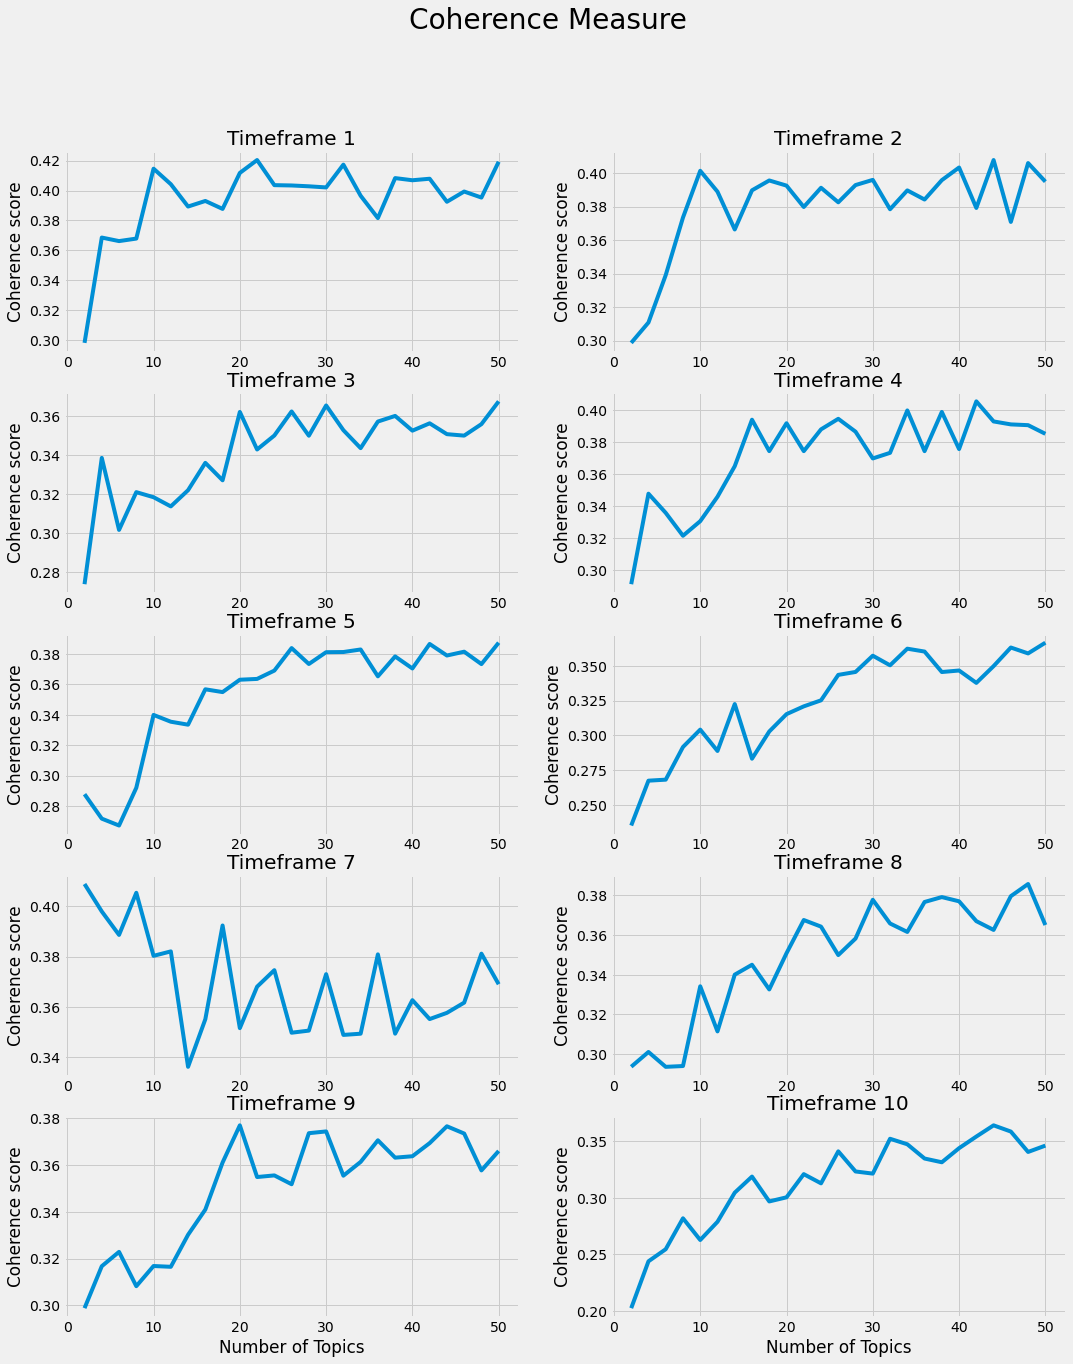

In [29]:
plot_coherence_scores(10, eth_corpus, eth_doc_list_ready, eth_id2word, 2, 50, 2)

<Figure size 432x288 with 0 Axes>